In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(''*25)
from sklearn.metrics import confusion_matrix

In [48]:
data = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [49]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [50]:
data.shape

(12043, 23)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [52]:
data.describe(include = 'all')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885,12043,12043,12043,12043,7717,883.0,12043,...,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3,100,1,100,6,5725,NaN,80,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,a27d1250de15477b9d88d945f593a8a7,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883,578,12043,578,3934,14,NaN,746,...,NaN,255,2169,10,NaN,1,12043,578,145,11160
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,28.000000,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,38.000000,NaN,NaN,NaN,53.655000,NaN,NaN,NaN,NaN,NaN


# Showing the age min and mix and the graph

The maximum age is 78
The minimum age is 18


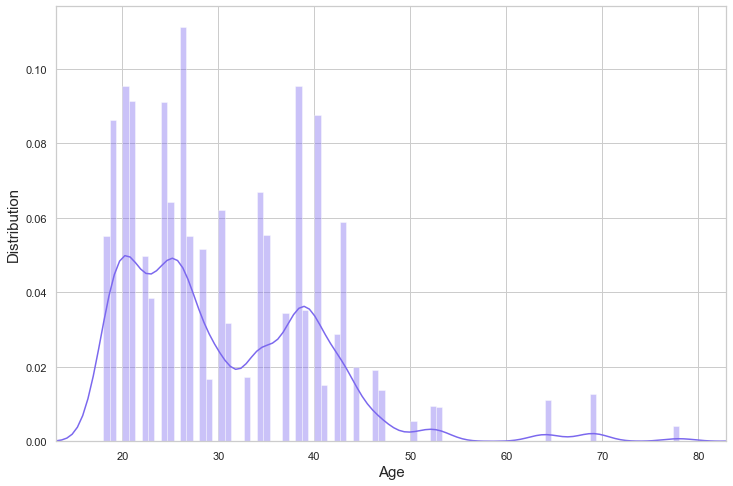

In [53]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(data['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", data['age'].max())
print ("The minimum age is", data['age'].min())

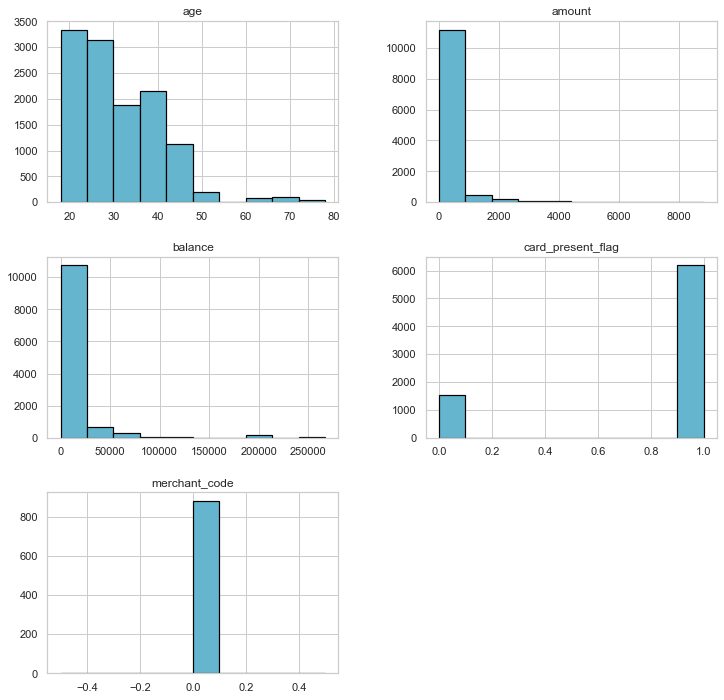

In [54]:
distribution = data.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers

In [81]:
print (data['balance'].median())
print (data['balance'].mean())

6432.01
14704.195553433592


# This shows the customer balance according to the age of the person

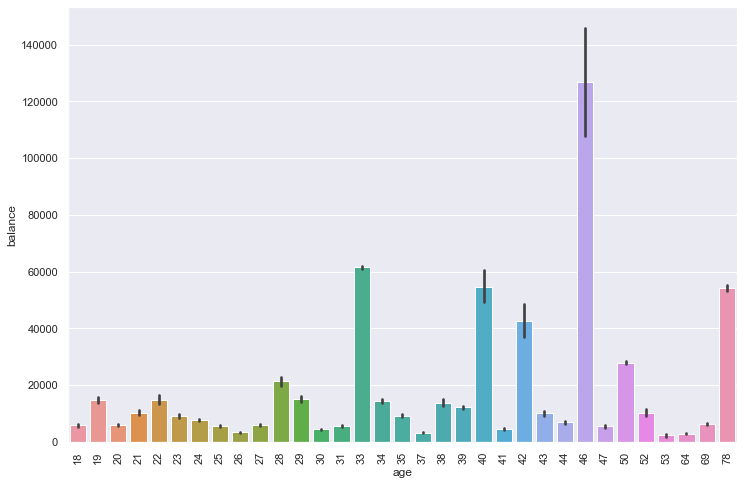

In [60]:
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = data['age'], y = data['balance'], data = data)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

# This bar graph shows the difference of amount between male and female 

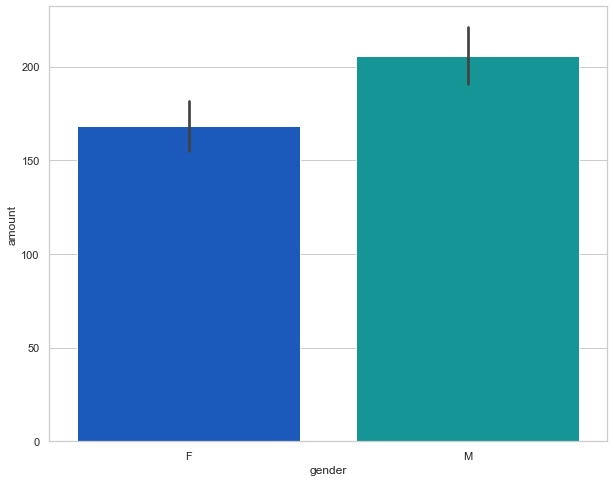

In [79]:
sns.set(style = 'whitegrid', rc={'figure.figsize':(10,8)})
sns.barplot(x = data['gender'], y = data['amount'], data = data,
          palette = 'winter');

# Calculate the Monthly Average Transaction Vol

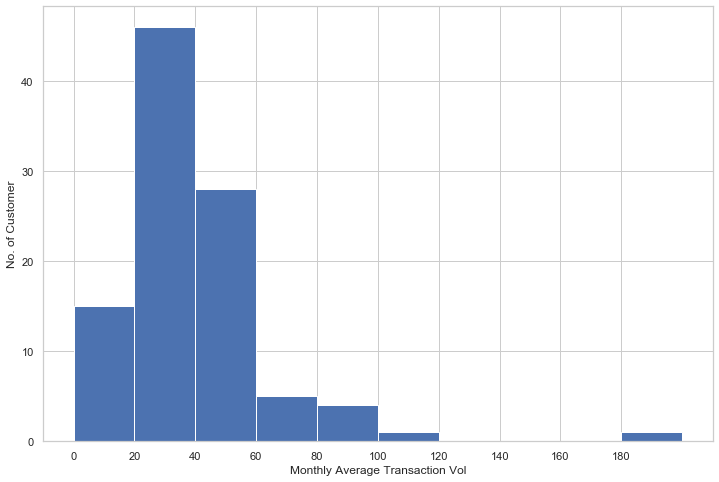

In [9]:
MAT = data.amount.groupby(data.account)
MATV = MAT.count()/3

plt.hist(MATV, bins = range(0,220,20))
plt.xlabel('Monthly Average Transaction Vol')
plt.ylabel('No. of Customer')
plt.xticks(np.arange(0, max(MATV)+1, 20.0))
plt.show()

# Calculate the Monthly Average Transaction Amount

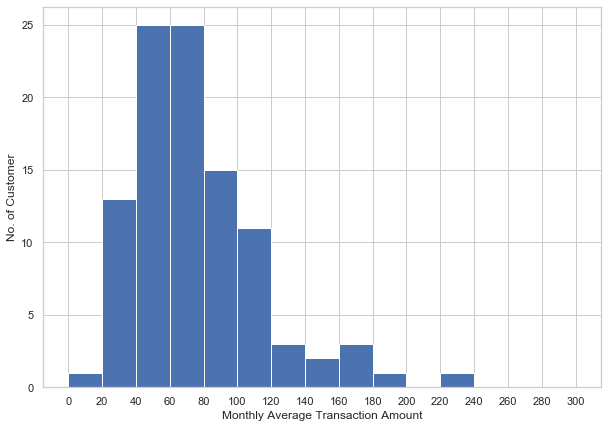

In [14]:
MATA = MAT.mean()/3

plt.hist(MATA,bins = range(0,320,20))
plt.xlabel('Monthly Average Transaction Amount')
plt.ylabel('No. of Customer')
plt.xticks(np.arange(0, 320, 20.0))
plt.show()

In [19]:
df_L = data[['account','long_lat','merchant_long_lat']]
#M_list = df[merchant_long_lat.groupby(df.account)
df_L.dropna(inplace=True)
df_L.drop_duplicates(inplace=True)
df_L.sort_values('long_lat', inplace=True)
df_L.reset_index(drop = True, inplace = True)

# Get names of indexes for which column Account  has value 'ACC-2901672282'
indexNames = df_L[df_L['account'] == 'ACC-2901672282'].index
 
# Delete these row indexes from dataFrame
df_L.drop(indexNames , inplace=True)

In [20]:
df_L.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 0 to 5638
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account            5639 non-null   object
 1   long_lat           5639 non-null   object
 2   merchant_long_lat  5639 non-null   object
dtypes: object(3)
memory usage: 176.2+ KB


In [21]:
df_L['Long'] = df_L.long_lat.str.split(' ').str[0].astype(float)
df_L['Lat'] = df_L.long_lat.str.split(' ').str[1].astype(float)
df_L['Long2'] = df_L.merchant_long_lat.str.split(' ').str[0].astype(float)
df_L['Lat2'] = df_L.merchant_long_lat.str.split(' ').str[1].astype(float)
df_L.head()

,account,long_lat,merchant_long_lat,Long,Lat,Long2,Lat2
0,ACC-1990648130,114.62 -28.80,153.45 -28.85,114.62,-28.8,153.45,-28.85
1,ACC-1990648130,114.62 -28.80,114.63 -28.76,114.62,-28.8,114.63,-28.76
2,ACC-1990648130,114.62 -28.80,151.02 -33.88,114.62,-28.8,151.02,-33.88
3,ACC-1990648130,114.62 -28.80,114.61 -28.77,114.62,-28.8,114.61,-28.77
4,ACC-1990648130,114.62 -28.80,145.15 -37.83,114.62,-28.8,145.15,-37.83


In [22]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df_L['distance'] = [haversine(df_L.Long[i],df_L.Lat[i],df_L.Long2[i],df_L.Lat2[i]) for i in range(len(df_L))]

(22.0, 300.0)

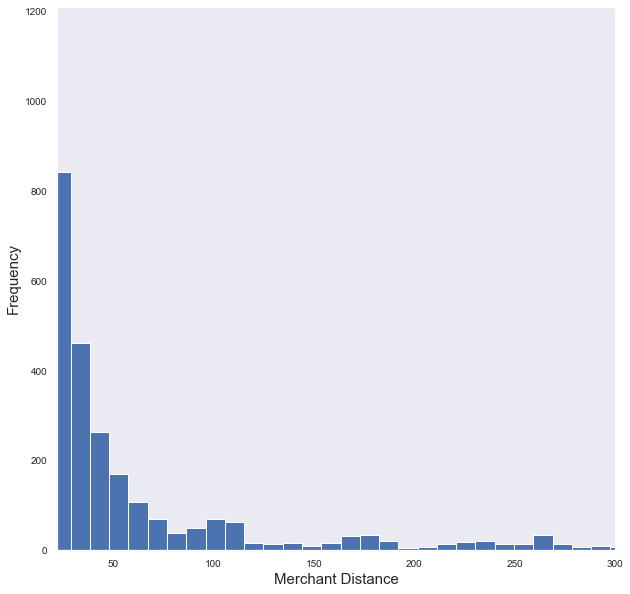

In [23]:
df_L.distance.hist(bins = 400, grid=False, xlabelsize=10, ylabelsize=10, figsize = (10,10) )
plt.xlabel('Merchant Distance', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim([22.0,300.0])

In [24]:
data['account'].nunique()

100

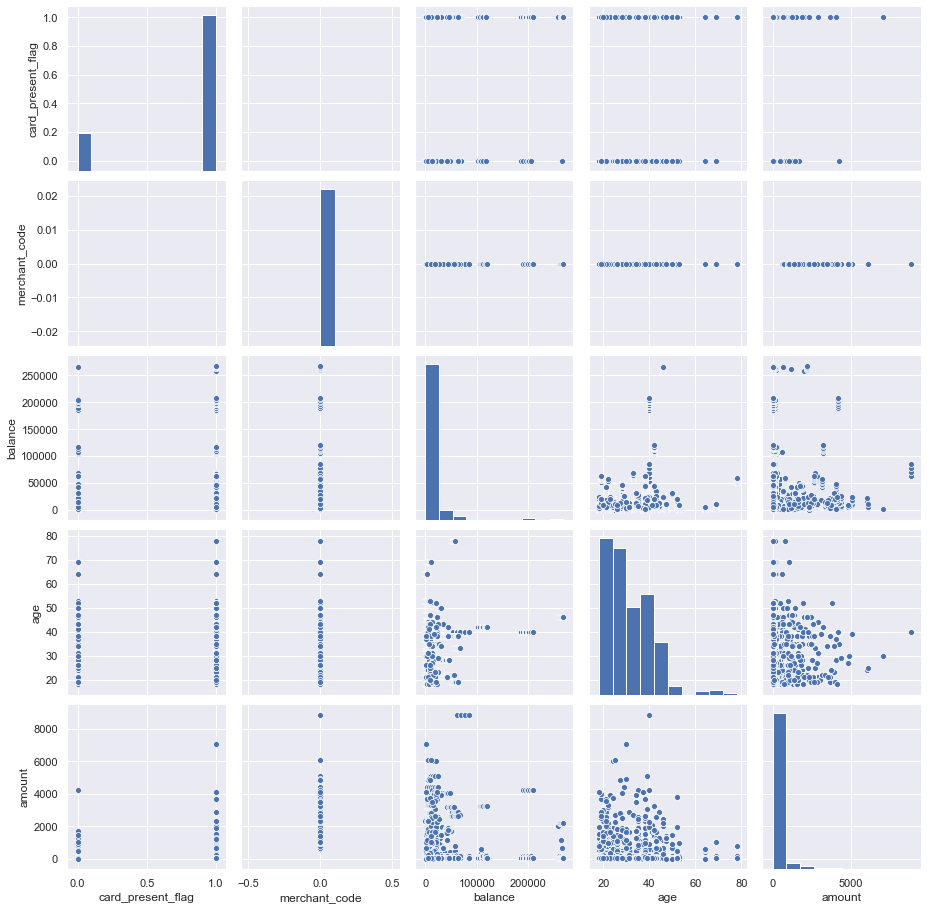

In [25]:
sb.pairplot(data)

In [26]:
data.isnull().sum()/len(data)*100

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

In [27]:
missing_values_count = data.isnull().sum()

In [28]:
missing_values_count[0:23]

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [29]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

15.866334042146077

In [30]:
missing_values_count[0:23]

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [31]:
data.dropna()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [32]:
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,01/08/2018,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,01/08/2018,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,01/08/2018,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,01/08/2018,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,01/08/2018,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit


In [33]:
print("Columns in original dataset: %d \n" % data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 23 

Columns with na's dropped: 16


In [34]:
subset_anz_data = data.loc[:, 'status':'movement'].head()
subset_anz_data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [35]:
# replace all NA's with 0
subset_anz_data.fillna(0)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [36]:
subset_anz_data.fillna(method = 'bfill', axis=0).fillna(0)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,0.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,0.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,0.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# This heatmap shows the Correlation between the different variables

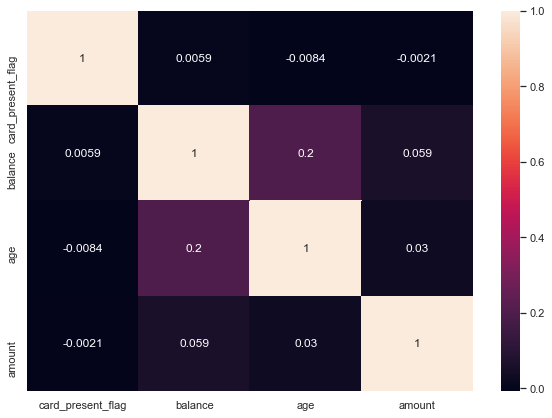

In [46]:
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(data.corr(), annot = True);

In [37]:
data = data[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
data["date"] = pd.to_datetime(data["date"])
data.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-01-08,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-01-08,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-01-08,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-01-08,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-01-08,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


# Total number of transactions made on each day

In [38]:
data["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

# Total number of transactions made by each customer

In [39]:
data["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

# Transaction volume each day

In [40]:
data_date_count = data.groupby("date").count()

In [41]:
trans_vol = data_date_count["customer_id"].mean()
n_points = len(data_date_count.index)

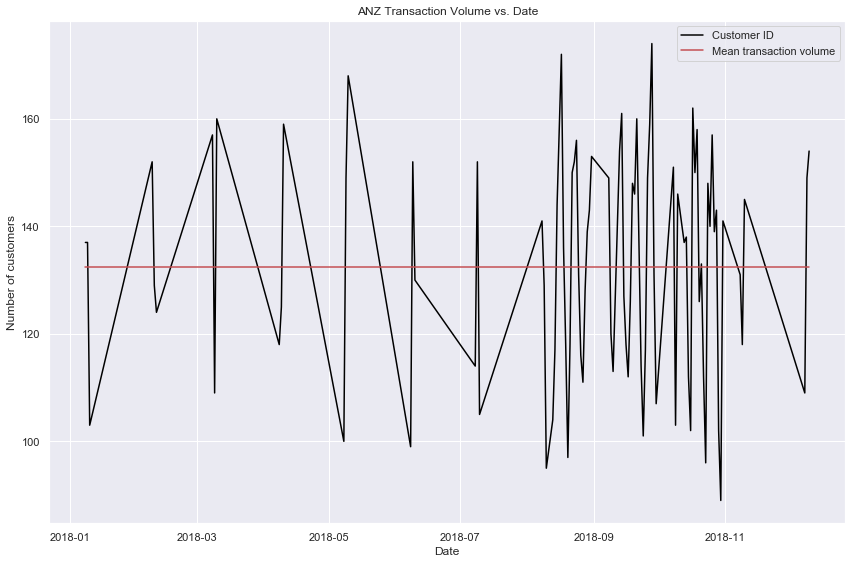

In [42]:
plt.figure()
plt.plot(data_date_count.index, data_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(data_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

# Mean transaction amount each day

In [43]:
data_date_mean = data.groupby("date").mean()

In [44]:
trans_amt = data_date_mean["amount"].mean()
n_points = len(data_date_count.index)

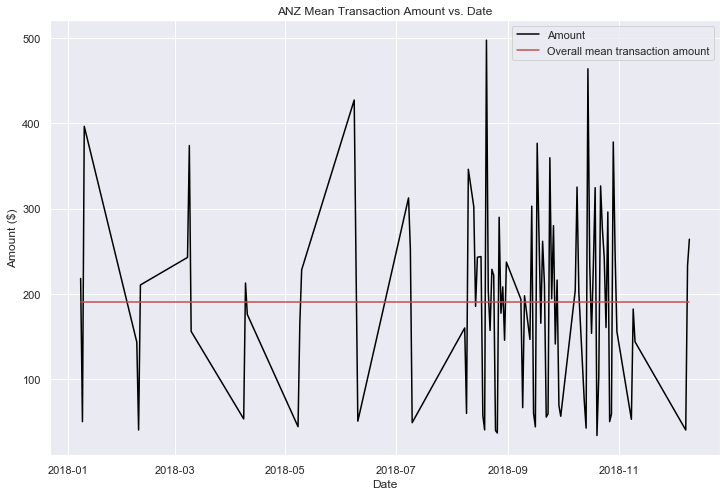

<Figure size 864x576 with 0 Axes>

In [45]:
plt.figure()
plt.plot(data_date_count.index, data_date_mean["amount"], c="black", label = "Amount")
plt.plot(data_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.figure()
plt.tight_layout()